## Regress: Google Stock Price data
https://www.kaggle.com/wogus934/google-stock/data

** Dataset Information: **

Google Stock Price information for 2013/09-2017/10

** Attribute Information: (784 features and 1 class) **

- Open
- High	
- Low	
- Close	
- Volume

** Objective of this project **

predict open price of 2017/10 based on 2013/09-2017/09

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Load Data
df_train = pd.read_csv('Google_Stock_Price_Train.csv',index_col='Date')
df_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col='Date')
df_train.head()
#df_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
9/26/2012,375.30,381.00,370.87,377.11,5674334
9/27/2012,380.35,381.80,376.20,378.63,3932272
9/28/2012,377.45,380.03,375.95,377.63,2784091
10/1/2012,379.90,382.88,378.48,381.27,3168477
10/2/2012,382.98,383.38,375.51,378.87,2790375


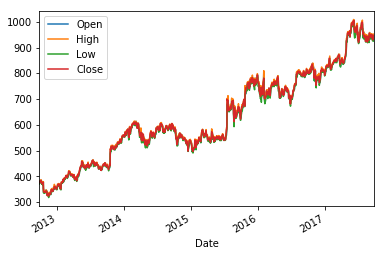

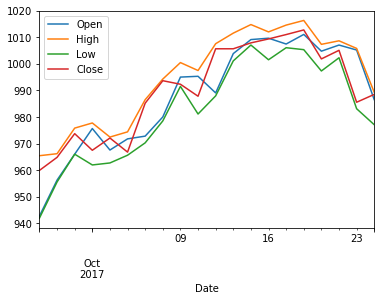

In [3]:
df_train.index = pd.to_datetime(df_train.index)
df_test.index = pd.to_datetime(df_test.index)
df_train.drop('Volume',axis=1).plot()
df_test.drop('Volume',axis=1).plot()

In [4]:
df_train.info()
print('==='*12)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-09-26 to 2017-09-26
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null float64
Volume    1258 non-null int64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-09-27 to 2017-10-24
Data columns (total 5 columns):
Open      20 non-null float64
High      20 non-null float64
Low       20 non-null float64
Close     20 non-null float64
Volume    20 non-null int64
dtypes: float64(4), int64(1)
memory usage: 960.0 bytes


In [5]:
df_train.describe()
#df_test.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,631.416161,636.062377,626.047448,631.197146,2.045335e+06
std,172.303143,173.188390,171.150477,172.290932,1.069595e+06
min,323.320000,326.830000,318.320000,323.910000,5.211410e+05
25%,523.062500,527.510000,517.820000,521.775000,1.426658e+06
50%,587.295000,589.930000,581.985000,586.450000,1.788089e+06
75%,769.927500,776.990000,762.282500,769.537500,2.313565e+06
max,1005.490000,1008.610000,996.620000,1004.280000,1.285814e+07


## LSTM

#### Data Preprocessing

In [21]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import mean_squared_error

# load train test set
train_set = pd.read_csv('Google_Stock_Price_Train.csv',index_col='Date')[['Open']]
test_set = pd.read_csv('Google_Stock_Price_Test.csv',index_col='Date')[['Open']]
#print(train_set.shape, test_set.shape)

# scale features
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set = sc.fit_transform(train_set)
#print(train_set.min(), train_set.max())

# create train set 
num_train = 1258
X_train = train_set[0:num_train-1]
y_train = train_set[1:num_train]

# reshape to (#inputs, #steps, input dim)
X_train = np.reshape(X_train, (num_train-1, 1, 1))
#print(X_train.shape, y_train.shape)

# create test set
num_test = 20
inputs = test_set.values
X_test = sc.transform(inputs).reshape(num_test,1,1)
#print(X_test.shape)

#### Model Train

In [7]:
seed = 101
np.random.seed(seed)
K.clear_session()
# create the model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, 
               input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
# compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(model.summary())
# train the model
model.fit(X_train, y_train, epochs = 200, batch_size = 32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
1257/1257 [==============================] - 2s 1ms/step - loss: 0.1805
Epoch 2/200
1257/1257 [==========================

1257/1257 [==============================] - 0s 155us/step - loss: 0.0012
Epoch 84/200
1257/1257 [==============================] - 0s 177us/step - loss: 0.0011
Epoch 85/200
1257/1257 [==============================] - 0s 160us/step - loss: 0.0011
Epoch 86/200
1257/1257 [==============================] - 0s 147us/step - loss: 0.0011
Epoch 87/200
1257/1257 [==============================] - 0s 152us/step - loss: 0.0011
Epoch 88/200
1257/1257 [==============================] - 0s 156us/step - loss: 0.0011
Epoch 89/200
1257/1257 [==============================] - 0s 162us/step - loss: 0.0010
Epoch 90/200
1257/1257 [==============================] - 0s 158us/step - loss: 0.0010
Epoch 91/200
1257/1257 [==============================] - 0s 166us/step - loss: 0.0011
Epoch 92/200
1257/1257 [==============================] - 0s 143us/step - loss: 0.0011
Epoch 93/200
1257/1257 [==============================] - 0s 162us/step - loss: 0.0011
Epoch 94/200
1257/1257 [==============================] 

1257/1257 [==============================] - 0s 156us/step - loss: 9.6285e-04
Epoch 173/200
1257/1257 [==============================] - 0s 149us/step - loss: 8.0707e-04
Epoch 174/200
1257/1257 [==============================] - 0s 150us/step - loss: 8.3856e-04
Epoch 175/200
1257/1257 [==============================] - 0s 146us/step - loss: 9.1261e-04
Epoch 176/200
1257/1257 [==============================] - 0s 149us/step - loss: 8.2991e-04
Epoch 177/200
1257/1257 [==============================] - 0s 142us/step - loss: 8.7231e-04
Epoch 178/200
1257/1257 [==============================] - 0s 147us/step - loss: 8.9341e-04
Epoch 179/200
1257/1257 [==============================] - 0s 155us/step - loss: 8.9080e-04
Epoch 180/200
1257/1257 [==============================] - 0s 145us/step - loss: 8.8901e-04
Epoch 181/200
1257/1257 [==============================] - 0s 146us/step - loss: 8.4740e-04
Epoch 182/200
1257/1257 [==============================] - 0s 147us/step - loss: 8.0188e-04
Ep

#### Model Evaluation

Test set, RMSE:  1.2959110904


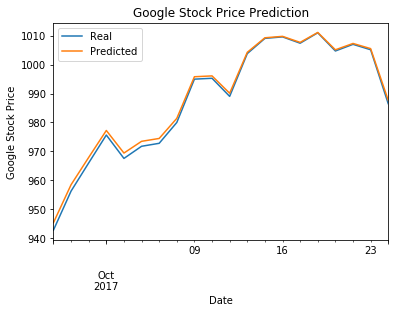

In [14]:
# make predictions
y_pred = sc.inverse_transform(model.predict(X_test))
# calculate rmse
rmse = np.sqrt(mean_squared_error(test_set.iloc[:,0], y_pred))
print('Test set, RMSE: ', rmse)

# visulaize the results
test_set['Prediction'] = y_pred
test_set.plot()
plt.ylabel('Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend(['Real','Predicted'])

## LSTM with 60 timesteps

#### Data Preprocessing

In [22]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import mean_squared_error

# load train test set
train_set = pd.read_csv('Google_Stock_Price_Train.csv',index_col='Date')[['Open']]
test_set = pd.read_csv('Google_Stock_Price_Test.csv',index_col='Date')[['Open']]
full_set = pd.concat((train_set, test_set), axis = 0)
#print(train_set.shape, test_set.shape, full_set.shape)

# scale feature
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set = sc.fit_transform(train_set)
#print(train_set.min(), train_set.max())

# create train set with 60 timesteps and 1 output
num_train = 1258
num_steps = 60
X_train = []
y_train = []
for i in range(num_steps , num_train):
    X_train.append(train_set[i-num_steps:i, 0])
    y_train.append(train_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
#print(X_train.shape,y_train.shape)

# reshape to (#inputs, #steps, input dim)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#print(X_train.shape,y_train.shape)

# plot some train set
#for i in range(0,X_train.shape[1],15):
#    plt.plot(range(X_train.shape[0]),X_train[:,i], label=i)
#plt.legend()

# create test set
inputs = full_set[len(full_set) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#print(X_test.shape)

#### Model Train

In [19]:
# import libraries
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

seed = 128
np.random.seed(seed)
K.clear_session()

# creat the model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, 
               input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
# compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(model.summary())
# train the model
model.fit(X_train, y_train, epochs = 200, batch_size = 32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 80/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 81/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 82/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 83/200
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0013
Epoch 84/200
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 85/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 86/200
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0013
Epoch 87/200
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 88/200
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0013
Epoch 89/200
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0012
Epoch 90/200
1198/1198 [==============================] - 6s 5ms/step - loss: 

1198/1198 [==============================] - 6s 5ms/step - loss: 8.4762e-04
Epoch 173/200
1198/1198 [==============================] - 6s 5ms/step - loss: 8.4485e-04
Epoch 174/200
1198/1198 [==============================] - 6s 5ms/step - loss: 8.0670e-04
Epoch 175/200
1198/1198 [==============================] - 6s 5ms/step - loss: 8.7317e-04
Epoch 176/200
1198/1198 [==============================] - 6s 5ms/step - loss: 8.4211e-04
Epoch 177/200
1198/1198 [==============================] - 6s 5ms/step - loss: 8.5332e-04
Epoch 178/200
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0010
Epoch 179/200
1198/1198 [==============================] - 6s 5ms/step - loss: 8.6594e-04
Epoch 180/200
1198/1198 [==============================] - 6s 5ms/step - loss: 8.0183e-04
Epoch 181/200
1198/1198 [==============================] - 6s 5ms/step - loss: 8.5704e-04
Epoch 182/200
1198/1198 [==============================] - 6s 5ms/step - loss: 8.4762e-04
Epoch 183/200
1198/1198 [===

#### Model Evaluation

Test set, RMSE:  17.0391912817


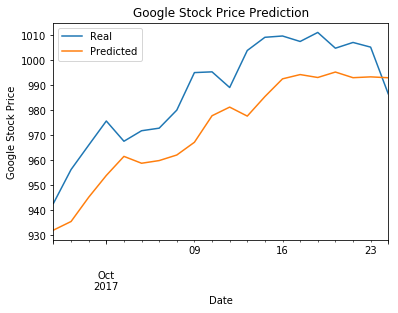

In [20]:
# make predictions
y_pred = sc.inverse_transform(model.predict(X_test))
# calculate rmse
rmse = np.sqrt(mean_squared_error(test_set.iloc[:,0], y_pred))
print('Test set, RMSE: ', rmse)

# visulaize the results
test_set['Prediction'] = y_pred
test_set.plot()
plt.ylabel('Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend(['Real','Predicted'])